**GEOGRAPHICALLY WEIGHTED REGRESSION**

### Ladino Alvarez Ricardo Arturo

**INTRODUCTION**

According to Fotheringham, Brunsdon, and Charlton (1998, 2002), geographically weighted regression (**GWR**) is a non-stationary technique that models spatially varying relationships Compared with a basic (global) regression, the coefficients in GWR are functions of spatial location given by the formulation:

$$y_{i} = \beta_{0} (u_{i}, v_{i}) + \sum_{k=1}^{m} \beta_{ik} (u_{i}, v_{i}) x_{ik} + \epsilon_{i} $$


The function $\beta_{k}(u_{i},v_{i})$ vary according to the values $(u_{i},v_{i})$, which represent the latitude and longitude geographical coordinates for observation (region) $i$,resulting in a different model for each region in the study. The assumptions of the classical linear regression model remain in place for **GWR**. 

In other words $y_{i}$ is the dependent variable at location $i$, $\beta_{i0}$ is the intercept coefficient at location $i$, $x_{ik}$ is the $kth$ explanatory variable at location $i$, $\beta_{ik}$ is the $kth$ local regression coefficient fot the $kth$ explanatory variable at location $i$, and $\epsilon_{i}$ is the random error term associated with location $i$ and $(u_{i},v_{i})$, indicating the location of the regression point. \


In matrix form, the **GWR** estimator for local parameter estimates at site $i$ is:  
  

$$\hat{\beta}_{i} = [X^{T} W(u_{i}, v_{i}) X]^{-1} X^{T} W(u_{i}, v_{i}) y $$ \
  
  


The matrix form for estimating the **GWR** parameters is given by:

\begin{equation} W(u_{i}, v_{i}) = 
\begin{bmatrix}
W_{i1} & 0 & \cdots & 0\\
0 & W_{i2} & \cdots & 0\\
\vdots & \vdots & \ddots & 0 \\
0 & 0 & \cdots & W_{in}
\end{bmatrix}
\end{equation} \\


Where $W(u_{i},v_{i})$ is a diagonal matrix and different for each point $i$ of coordinates $(u_{i},v_{i})$, containing the weights $W_{ij}$ in its main diagonal, obtained via the weighting functions, or kernel. 

| Weighting Functions | Weighting Function Formulas |
|---|-----|
| Fixed Gaussian | $w_{ij} = exp \{ -\frac{1}{2} (\frac{d_{ij}}{b})^{2} \}$  |
| Fixed Bisquare | $w_{ij} = [1 - (\frac{d_{ij}}{b})^{2}]^{2}$, if $d_{ij} < b$, and $W_{ij} = 0$ otherwise |
| Adaptive Gaussian | $w_{ij} = exp \{ -\frac{1}{2} (\frac{d_{ij}}{b_{ik}})^{2} \}$ |
|Adaptive Bisquare | $w_{ij} = [1 - (\frac{d_{ij}}{b_{ik}})^{2}]^{2}$, if $d_{ij} < b_{ik}$, and $W_{ij} = 0$ otherwise|


Where $d_{ij}$ is the distance between observation point $j$ and regression point $i$, and $b$ is the kernel **bandwidt**

An optimum bandwidth can be found by minimising some model goodness-of-fit
diagnostic (Loader 1999), such as the cross-validation (CV) score (Cleveland 1979,Bowman 1984), which only accounts for model prediction accuracy, or the Akaike Information Criterion (AIC) (Akaike 1973). Thus for a GWR model with a bandwidth $b$, its $AIC_c$ can be found from:


$$AIC_c = 2n log_{e} \left(\frac{RSS}{n} \right) + n log_{e}(2\pi) + n  \left\lbrace \frac{n + tr(S)}{n-2-tr(S)} \right\rbrace$$

where $n$ is the number of observations, S is the influence or hat matrix, and $RSS$ is the residual sum of squares 

In [ ]:
#### Librerias 

import numpy as np
import pandas as pd
import geopandas as gpd
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl

Se disponen los datos de forma aleatoria para no obtener efectos de orden compulsivo que podrían afectar el rendimiento del descenso de gradiente estocástico

In [19]:
california_housing = california_housing.reindex(
    np.random.permutation(california_housing.index))
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7075,-118.32,34.07,52.0,2980.0,366.0,967.0,359.0,11.2185,500001.0
11700,-121.30,38.04,8.0,2668.0,447.0,1713.0,444.0,4.0156,117600.0
16634,-122.73,38.46,14.0,2324.0,754.0,1026.0,677.0,1.7220,150000.0
2731,-117.69,33.60,12.0,3258.0,421.0,1464.0,435.0,6.5413,332000.0
15053,-122.25,37.82,32.0,3809.0,1098.0,1806.0,1022.0,2.6429,218500.0


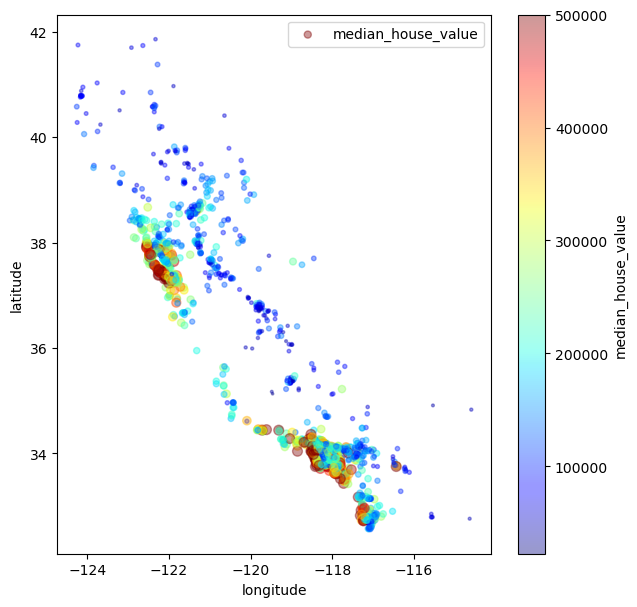

In [20]:
california_housing.plot(kind="scatter", x="longitude", y="latitude",
    s=california_housing['median_house_value']/10000, label="median_house_value",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(7,7),
)
plt.legend()
plt.show()

In [21]:
## Dataframe a geodataframe, para transformar las distancias geograficas a planas.
ho_pr_g = gpd.GeoDataFrame(california_housing, geometry=gpd.points_from_xy(california_housing.longitude,
california_housing.latitude))
ho_pr_g.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,geometry
7075,-118.32,34.07,52.0,2980.0,366.0,967.0,359.0,11.2185,500001.0,POINT (-118.32 34.07)
11700,-121.30,38.04,8.0,2668.0,447.0,1713.0,444.0,4.0156,117600.0,POINT (-121.3 38.04)
16634,-122.73,38.46,14.0,2324.0,754.0,1026.0,677.0,1.7220,150000.0,POINT (-122.73 38.46)
2731,-117.69,33.60,12.0,3258.0,421.0,1464.0,435.0,6.5413,332000.0,POINT (-117.69 33.6)
15053,-122.25,37.82,32.0,3809.0,1098.0,1806.0,1022.0,2.6429,218500.0,POINT (-122.25 37.82)


In [25]:
def euclidian_distance(cord_i, cord_j): 
  dif_x = cord_i[0] - cord_j[0]
  dif_y = cord_i[1] - cord_j[1]
  return np.sqrt((dif_x**2) + (dif_y**2))

def Fixed_Gaussian(cord_i, cord_j, b):
  dij = euclidian_distance(cord_i, cord_j)
  return np.exp(-0.5*((dij/b)**2))

In [26]:
u.describe()

count    1700.000000
mean      276.930830
std       173.299196
min      -116.592845
25%       102.716502
50%       366.255343
75%       409.735288
max       722.019424
Name: x, dtype: float64

In [ ]:
# Se crea un visual del ancho de banda en su minimo
bws   = np.linspace(-112, 725, 20) # la serie de valores corresponden al valor min, max de u
error = np.zeros(bws.shape[0])
aics  = np.zeros(bws.shape[0])

# m + 1 es el número de variables independientes
m = g_X.shape[1] + 1
# I es el numero de observaciones
I = g_X.shape[0]
n=I

# Se construye la matrix X
intercep  = np.ones((I,1))
X         = np.hstack((intercep, g_X)) # Cada fila contiene el intercepto y la variable independiente x

for ind, b in enumerate(bws):
  # Creación de la matriz de distancia - impedancia espacial
  ED = np.array([[Fixed_Gaussian(g_coords[i], g_coords[j], b) for j in range(I)] for i in range(I)])

  # Se crean las matrices que contendran la información en yi, bi, S
  yi = np.zeros(I)
  bi = np.zeros((m, I))
  S = np.zeros((I, I))
  for i in range(I):
    ## Proceso de regresión
    Wi    = np.diag(ED[i,:])
    Xt    = X.transpose()
    XtW   = np.matmul(Xt, Wi)
    inv     = np.linalg.inv(np.matmul(XtW, X))
    beta    = np.matmul(inv,np.matmul(XtW, g_y))

    bi[:,i] = beta[:,0] # Se guardan los valores
    yi[i]   = np.dot(X[i,:], beta) # Se guardan las estimaciones

    # Estimado de S
    S[i,:] = np.matmul(X[i,:], np.matmul(inv, XtW))

  # Estimación del error
  RSS = np.sum((g_y[:,0]-yi)**2)
  error[ind] = (1/n)*RSS

  # Estimacion de AICc
  tS        = np.trace(S)
  aics[ind] = 2*n*np.log(RSS/n) + n*np.log(2*np.pi)+ n*((n + tS)/(n-2-tS))


/var/folders/2x/23v6nt250yqfscjb_9w08h_w0000gn/T/ipykernel_4581/2438183549.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi[i]   = np.dot(X[i,:], beta) # Se guardan las estimaciones


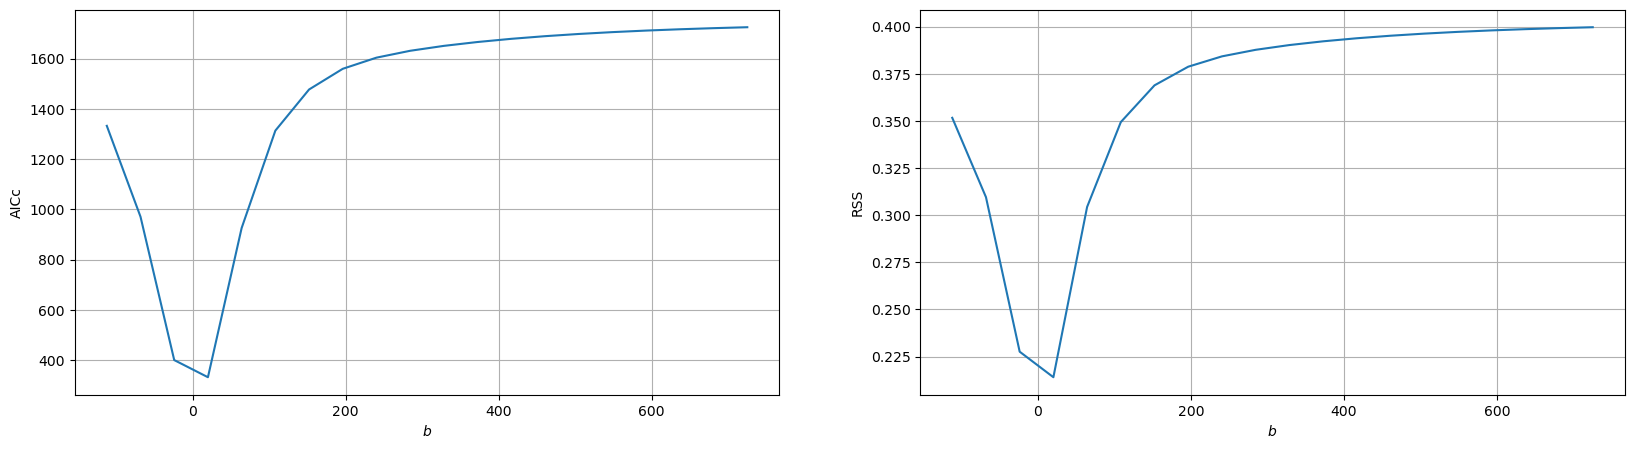

[(-112.0, 1332.1565545263381), (-67.94736842105263, 970.2812791439815), (-23.89473684210526, 399.65607884148767), (20.15789473684211, 331.3877657584376), (64.21052631578948, 925.391410424585), (108.26315789473685, 1313.0603708166452), (152.31578947368422, 1476.8346493006202), (196.36842105263156, 1559.2270252843452), (240.42105263157896, 1603.5943801644341), (284.47368421052636, 1630.9403577337298), (328.5263157894737, 1650.4912401157449), (372.57894736842104, 1665.8919622525161), (416.63157894736844, 1678.541430681497), (460.68421052631584, 1689.067440558192), (504.7368421052631, 1697.8565132524584), (548.7894736842105, 1705.2092428616454), (592.8421052631579, 1711.3775606265103), (636.8947368421053, 1716.5729671213483), (680.9473684210527, 1720.97044695996), (725.0, 1724.7129036716735)]


In [ ]:
fig, ax = plt.subplots(1,2,figsize = (20, 5))
ax[0].plot(bws, aics)
ax[0].set_xlabel(r"$b$")
ax[0].set_ylabel("AICc")
ax[0].grid(True)
ax[1].plot(bws, error)
ax[1].grid(True)
ax[1].set_xlabel(r"$b$")
ax[1].set_ylabel("RSS")
plt.show()

comb = list(zip(bws,aics))
print(comb)

* El ancho de banda adecuado corresponde al valor mínimo.

* Se continua con el proceso de regresión.

In [ ]:
b =  20 #Ancho de banda con el valor mínimo
# Matriz de impedancia
ED = np.array([[Fixed_Gaussian(g_coords[i], g_coords[j], b) for j in range(I)] for i in range(I)])
yi = np.zeros(I)
bi = np.zeros((m, I))
for i in range(I):
  Wi = np.diag(ED[i,:])
  Xt = X.transpose()
  XtW = np.matmul(Xt, Wi)

  inv     = np.linalg.inv(np.matmul(XtW, X))
  beta    = np.matmul(inv,np.matmul(XtW, g_y))
  bi[:,i] = beta[:,0]
  yi[i]   = np.dot(X[i,:], beta)

/var/folders/2x/23v6nt250yqfscjb_9w08h_w0000gn/T/ipykernel_4581/2429556593.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi[i]   = np.dot(X[i,:], beta)


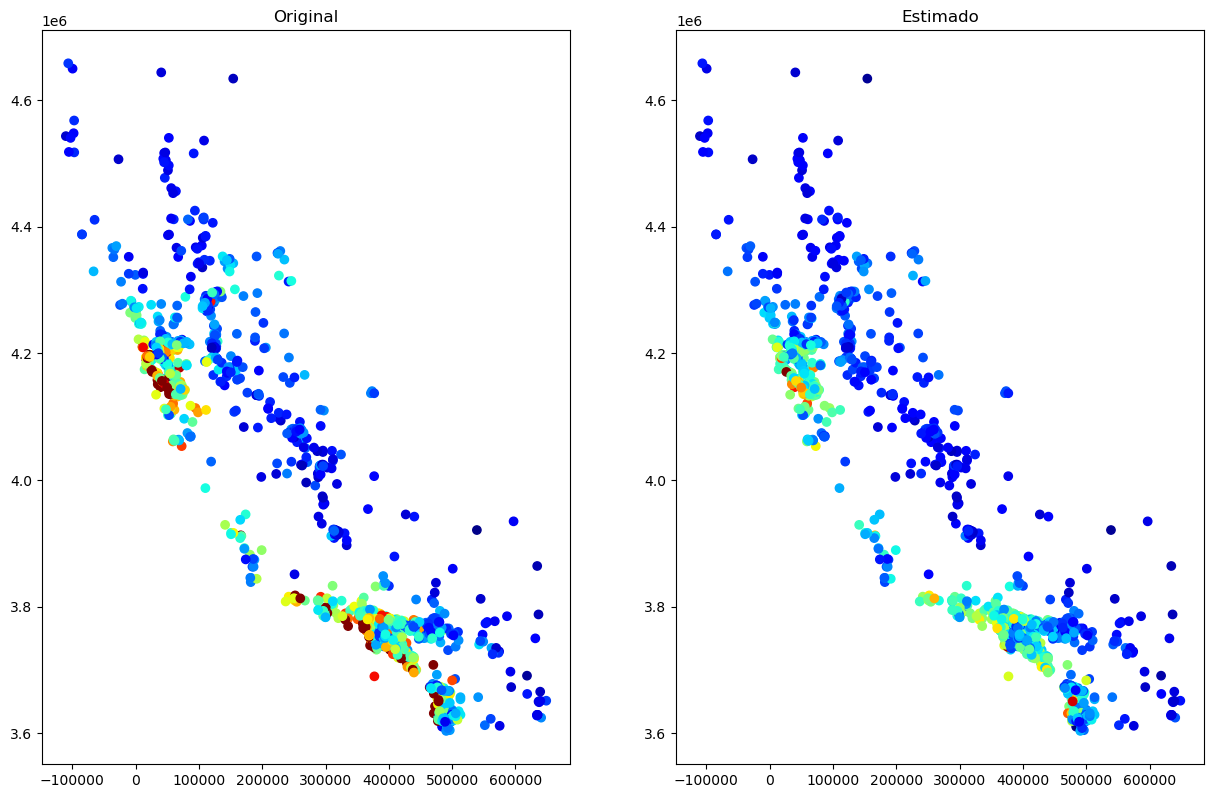

RSS: 0.21336819000577412


In [ ]:
fig, ax = plt.subplots(1,2,figsize = (15, 15))
california_uso.plot('median_house_value', cmap=plt.get_cmap("jet"), ax=ax[0]) 
ax[0].set_title('Original')
california_uso.plot(yi, cmap=plt.get_cmap("jet"), ax=ax[1])
ax[1].set_title('Estimado')
plt.show()

print(f"RSS: {(1/I)*np.sum((g_y[:,0]-yi)**2)}")